In [1]:
import numpy as np
import pandas as pd
from dbfread import DBF
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

Selecione o período que iremos analisar: 

In [2]:
ano = 2018
mes = 1

In [3]:
filename = '/Users/eduardoaraujo/Documents/ArboFronteiras_data/ArboFronteiras/dados Foz/dados_mosquitos_Foz_com_dbf/armadilhas_liraa_XY.dbf'

data_dbf = DBF(filename)
df = pd.DataFrame(iter(data_dbf))

df.set_index('data_ativi', inplace = True)

df.index = pd.to_datetime(df.index)
df.head()

,_uid_,bimestre,id,quarteirao,id_armadil,area,tipo_ativi,notificaca,ciclo,habitantes,...,m_out_m_m,m_out_m_v,m_out_f_m,m_out_f_v,cmt_dengue,cmt_zika,cmt_chk,cmt_outras,x,y
data_ativi,,,,,,,,,,,,,,,,,,,,,
2017-01-09,1,1.0,10063-03080427445357,1006,3-03080,037,LIRAa,,,3.5,...,0,0,0,0,0,0,0,0,-54.576939,-25.515972
2017-01-09,2,1.0,10103-02960427445382,1010,3-02960,037,LIRAa,,,3.5,...,0,0,0,0,0,0,0,0,-54.576696,-25.516518
2017-01-09,3,1.0,11011-0670442744492,110,11-06704,031,LIRAa,,,3.5,...,0,0,0,0,0,0,0,0,-54.569287,-25.575372
2017-01-09,4,1.0,11038-06421427445913,1103,8-06421,100,LIRAa,,,4.0,...,0,0,0,0,0,0,0,0,-54.557526,-25.524052
2017-01-09,5,1.0,11098-06665427445952,1109,8-06665,100,LIRAa,,,5.0,...,0,0,0,0,0,0,0,0,-54.559056,-25.522890


In [4]:
df_virus = pd.read_excel(io = '/Users/eduardoaraujo/Documents/ArboFronteiras_data/ArboFronteiras/dados Foz/Foz do Iguaçu/mosquitos positivos 2017 a 2022.xlsx'
)


df_virus.set_index('data_atividade', inplace = True)

df_virus.index = pd.to_datetime(df_virus.index)

df_virus

,id,quarteirao,id_armadilha,area,tipo_atividade,notificacao,ciclo,habitantes,total_dep_aed_aeg,total_dep_aed_alb,...,mosq_outros_m_vivo,mosq_outros_f_morto,mosq_outros_f_vivo,cmt_dengue,cmt_zika,cmt_chk,cmt_outras,amostra_ccz,long,lat
data_atividade,,,,,,,,,,,,,,,,,,,,,
2018-01-05,23211-04853431054227,232,11-04853,69,LIRAa,NaN,NaN,3.5,0,0,...,0,0,0,x,0,0,0,NaN,-54.581224,-25.578429
2018-01-05,30572-04561431052824,3057,2-04561,19,LIRAa,NaN,NaN,3.5,0,0,...,0,0,0,x,0,0,0,NaN,-54.567363,-25.490126
2018-01-05,8069-02930431052886,806,9-02930,77,LIRAa,NaN,NaN,3.5,0,0,...,0,0,0,x,0,0,0,NaN,-54.585564,-25.537226
2018-01-08,23495-03060431083761,2349,5-03060,7,LIRAa,NaN,NaN,3.5,0,0,...,0,0,0,x,0,0,0,NaN,-54.523818,-25.485776
2018-03-07,17107-05206431669361,1710,7-05206,47,LIRAa,NaN,NaN,3.2,0,0,...,0,0,0,x,0,0,0,NaN,-54.543394,-25.530519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-03,26404-00788431032215,2640,4-00788,85,LIRAa,NaN,NaN,3.5,0,0,...,0,0,0,x,0,0,0,NaN,-54.550124,-25.502065
2018-01-03,26984-03489431032139,2698,4-03489,29,LIRAa,NaN,NaN,5.0,0,0,...,0,0,0,x,0,0,0,NaN,-54.556716,-25.493797
2018-01-04,24825-09174431041362,2482,5-09174,50,LIRAa,NaN,NaN,3.0,0,0,...,0,0,0,x,0,0,0,NaN,-54.530200,-25.472605


In [5]:
df_virus.columns

Index(['id', 'quarteirao', 'id_armadilha', 'area', 'tipo_atividade',
       'notificacao', 'ciclo', 'habitantes', 'total_dep_aed_aeg',
       'total_dep_aed_alb', 'total_dep_outros', 'mosq_aed_aeg_m_morto',
       'mosq_aed_aeg_m_vivo', 'mosq_aed_aeg_f_morto', 'mosq_aed_aeg_f_vivo',
       'mosq_aed_alb_m_morto', 'mosq_aed_alb_m_vivo', 'mosq_aed_alb_f_morto',
       'mosq_aed_alb_f_vivo', 'mosq_outros_m_morto', 'mosq_outros_m_vivo',
       'mosq_outros_f_morto', 'mosq_outros_f_vivo', 'cmt_dengue', 'cmt_zika',
       'cmt_chk', 'cmt_outras', 'amostra_ccz', 'long', 'lat'],
      dtype='object')

In [6]:
base = '/Users/eduardoaraujo/Documents/ArboFronteiras_data/ArboFronteiras/dados Foz/estratos_shapefile'

path = base + "/" + "Estratos.shp"


map_foz = gpd.read_file(path)
map_foz

,id,nome_estra,municipio_,perímetro,área_Km²,geometry
0,1,1,4108304,17.686,8.905,"POLYGON ((-54.56720 -25.44293, -54.56723 -25.4..."
1,2,2,4108304,19.270,12.122,"POLYGON ((-54.56557 -25.48446, -54.55810 -25.4..."
2,3,3,4108304,16.009,10.864,"POLYGON ((-54.57112 -25.53005, -54.57126 -25.5..."
3,4,4,4108304,23.756,14.274,"POLYGON ((-54.54595 -25.49985, -54.54621 -25.4..."
4,5,5,4108304,59.905,41.825,"POLYGON ((-54.52493 -25.48617, -54.52492 -25.4..."
5,9,9,4108304,9.696,4.374,"POLYGON ((-54.56541 -25.54795, -54.56653 -25.5..."
6,11,11,4108304,24.671,14.043,"POLYGON ((-54.57717 -25.59009, -54.57722 -25.5..."
7,10,10,4108304,16.941,8.417,"POLYGON ((-54.57110 -25.56911, -54.57108 -25.5..."
8,7,7,4108304,13.504,6.201,"POLYGON ((-54.53860 -25.55307, -54.53613 -25.5..."
9,6,6,4108304,10.129,5.131,"POLYGON ((-54.54483 -25.51627, -54.54449 -25.5..."


Plotando a localização das armadilhas: 

In [7]:
crs = {'init':'EPSG:4326'}
mask = (df.index.year == ano) & (df.index.month == mes)
geometry = [Point(xy) for xy in zip(df.loc[mask]['x'], df.loc[mask]['y'])]
geo_df_all = gpd.GeoDataFrame(df.loc[mask], 
                          crs = crs, 
                          geometry = geometry)

/opt/homebrew/Caskroom/miniforge/base/envs/arbo-fronteiras/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [8]:
geo_df_all.head()

,_uid_,bimestre,id,quarteirao,id_armadil,area,tipo_ativi,notificaca,ciclo,habitantes,...,m_out_m_v,m_out_f_m,m_out_f_v,cmt_dengue,cmt_zika,cmt_chk,cmt_outras,x,y,geometry
data_ativi,,,,,,,,,,,,,,,,,,,,,
2018-01-03,9291,1.0,10003-02311431031589,1000,3-02311,037,LIRAa,,,4.0,...,0,0,0,0,0,0,0,-54.573880,-25.518881,POINT (-54.57388 -25.51888)
2018-01-03,9292,1.0,10023-0278943103488,1002,3-02789,037,LIRAa,,,3.5,...,0,0,0,0,0,0,0,-54.579898,-25.517024,POINT (-54.57990 -25.51702)
2018-01-03,9293,1.0,10033-02814431031592,1003,3-02814,037,LIRAa,,,8.0,...,0,0,0,0,0,0,0,-54.581124,-25.516957,POINT (-54.58112 -25.51696)
2018-01-03,9294,1.0,10043-05609431031597,1004,3-05609,037,LIRAa,,,7.0,...,0,0,0,0,0,0,0,-54.583731,-25.516811,POINT (-54.58373 -25.51681)
2018-01-03,9295,1.0,10063-0308043103504,1006,3-03080,037,LIRAa,,,3.5,...,0,0,0,0,0,0,0,-54.576939,-25.515972,POINT (-54.57694 -25.51597)


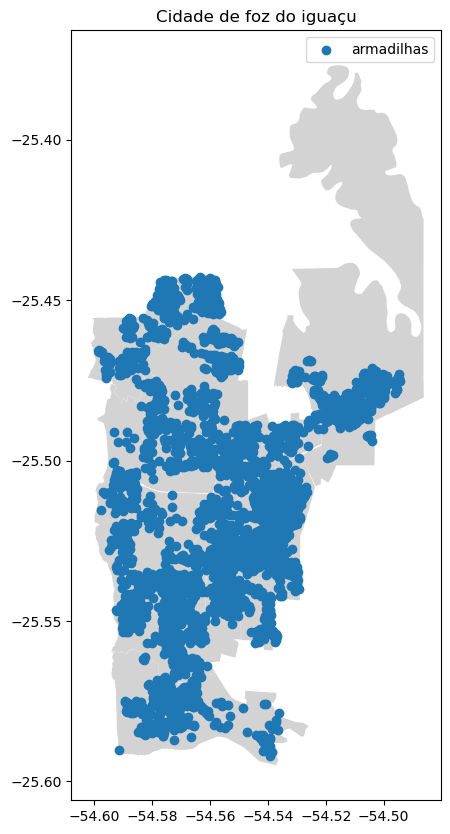

In [9]:
fig, ax = plt.subplots(figsize = (10,10))
map_foz.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df_all.plot(ax=ax, color = 'tab:blue', label = 'armadilhas')
ax.set_title('Cidade de foz do iguaçu')
ax.legend()
plt.show()

Plotando apenas a localização das armadilhas positivas (isso é que capturaram algum mosquito):

In [10]:
df_pos = df.loc[(df.m_aaeg_m_m > 0) | 
                             (df.m_aaeg_m_v  > 0) |
                            (df.m_aaeg_f_m > 0) |
                            (df.m_aaeg_f_v > 0) ]

print('Porcentagem de armadilhas positivas:', df_pos.shape[0]/df.shape[0])

df_pos.head()

Porcentagem de armadilhas positivas: 0.1092546248589234


,_uid_,bimestre,id,quarteirao,id_armadil,area,tipo_ativi,notificaca,ciclo,habitantes,...,m_out_m_m,m_out_m_v,m_out_f_m,m_out_f_v,cmt_dengue,cmt_zika,cmt_chk,cmt_outras,x,y
data_ativi,,,,,,,,,,,,,,,,,,,,,
2017-01-09,4,1.0,11038-06421427445913,1103,8-06421,100,LIRAa,,,4.0,...,0,0,0,0,0,0,0,0,-54.557526,-25.524052
2017-01-09,23,1.0,12658-08157427446830,1265,8-08157,024,LIRAa,,,3.5,...,0,0,0,0,0,0,0,0,-54.557317,-25.526984
2017-01-09,30,1.0,13048-05890427447080,1304,8-05890,022,LIRAa,,,3.5,...,0,0,0,0,0,0,0,0,-54.544011,-25.525458
2017-01-09,52,1.0,14637-00559427447961,1463,7-00559,057,LIRAa,,,3.5,...,0,0,0,0,0,0,0,0,-54.541180,-25.555543
2017-01-09,82,1.0,18826-02863427449885,1882,6-02863,003,LIRAa,,,3.5,...,0,0,0,0,0,0,0,0,-54.533863,-25.515371


In [11]:
df_pos.cmt_dengue.value_counts()

0     8767
x      133
x*       6
Name: cmt_dengue, dtype: int64

In [12]:
df_pos.cmt_dengue.isnull().sum()

0

In [13]:
crs = {'init':'EPSG:4326'}
mask_pos = (df_pos.index.year == ano) & (df_pos.index.month == mes)
geometry = [Point(xy) for xy in zip(df_pos.loc[mask_pos]['x'], df_pos.loc[mask_pos]['y'])]
geo_df_pos = gpd.GeoDataFrame(df_pos.loc[mask_pos], 
                          crs = crs, 
                          geometry = geometry)

/opt/homebrew/Caskroom/miniforge/base/envs/arbo-fronteiras/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [14]:
geo_df_pos

,_uid_,bimestre,id,quarteirao,id_armadil,area,tipo_ativi,notificaca,ciclo,habitantes,...,m_out_m_v,m_out_f_m,m_out_f_v,cmt_dengue,cmt_zika,cmt_chk,cmt_outras,x,y,geometry
data_ativi,,,,,,,,,,,,,,,,,,,,,
2018-01-03,9308,1.0,10313-025404310324,1031,3-02540,071,LIRAa,,,3.5,...,0,0,0,0,0,0,0,-54.559636,-25.517527,POINT (-54.55964 -25.51753)
2018-01-03,9323,1.0,10693-0475943103308,1069,3-04759,071,LIRAa,,,3.0,...,0,0,0,0,0,0,0,-54.554912,-25.509453,POINT (-54.55491 -25.50945)
2018-01-03,9325,1.0,10753-049294310310,1075,3-04929,071,LIRAa,,,3.5,...,0,0,0,0,0,0,0,-54.550631,-25.508638,POINT (-54.55063 -25.50864)
2018-01-03,9341,1.0,11918-0374243103679,1191,8-03742,028,LIRAa,,,3.5,...,0,0,0,0,0,0,0,-54.568421,-25.531457,POINT (-54.56842 -25.53146)
2018-01-03,9353,1.0,12198-0239443103120,1219,8-02394,024,LIRAa,,,3.5,...,0,0,0,0,0,0,0,-54.558579,-25.534823,POINT (-54.55858 -25.53482)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-06,52339,1.0,6519-01758431064440,651,9-01758,009,LIRAa,,,3.5,...,0,0,0,0,0,0,0,-54.575061,-25.540162,POINT (-54.57506 -25.54016)
2018-01-06,52340,1.0,6599-04147431063845,659,9-04147,009,LIRAa,,,3.5,...,0,0,0,0,0,0,0,-54.575216,-25.538366,POINT (-54.57522 -25.53837)
2018-01-06,52345,1.0,7919-01313431064391,791,9-01313,077,LIRAa,,,3.5,...,0,0,0,x,0,0,0,-54.589426,-25.542157,POINT (-54.58943 -25.54216)


In [15]:
geo_df_pos.bimestre.value_counts()

1.0    225
Name: bimestre, dtype: int64

Olhando apenas as amostras que foi encontrado o vírus da dengue:

In [16]:
crs = {'init':'EPSG:4326'}
mask_virus = (df_virus.index.year == ano) & (df_virus.index.month == mes) 
geometry = [Point(xy) for xy in zip(df_virus.loc[mask_virus]['long'], df_virus.loc[mask_virus]['lat'])]
geo_df_virus = gpd.GeoDataFrame(df_virus.loc[mask_virus], 
                          crs = crs, 
                          geometry = geometry)

/opt/homebrew/Caskroom/miniforge/base/envs/arbo-fronteiras/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [17]:
geo_df_virus

,id,quarteirao,id_armadilha,area,tipo_atividade,notificacao,ciclo,habitantes,total_dep_aed_aeg,total_dep_aed_alb,...,mosq_outros_f_morto,mosq_outros_f_vivo,cmt_dengue,cmt_zika,cmt_chk,cmt_outras,amostra_ccz,long,lat,geometry
data_atividade,,,,,,,,,,,,,,,,,,,,,
2018-01-05,23211-04853431054227,232,11-04853,69,LIRAa,NaN,NaN,3.5,0,0,...,0,0,x,0,0,0,NaN,-54.581224,-25.578429,POINT (-54.58122 -25.57843)
2018-01-05,30572-04561431052824,3057,2-04561,19,LIRAa,NaN,NaN,3.5,0,0,...,0,0,x,0,0,0,NaN,-54.567363,-25.490126,POINT (-54.56736 -25.49013)
2018-01-05,8069-02930431052886,806,9-02930,77,LIRAa,NaN,NaN,3.5,0,0,...,0,0,x,0,0,0,NaN,-54.585564,-25.537226,POINT (-54.58556 -25.53723)
2018-01-08,23495-03060431083761,2349,5-03060,7,LIRAa,NaN,NaN,3.5,0,0,...,0,0,x,0,0,0,NaN,-54.523818,-25.485776,POINT (-54.52382 -25.48578)
2018-01-06,15407-02065431062658,1540,7-02065,59,LIRAa,NaN,NaN,5.0,0,0,...,0,0,x,0,0,0,NaN,-54.548879,-25.543857,POINT (-54.54888 -25.54386)
2018-01-06,15517-02424431064310,1551,7-02424,59,LIRAa,NaN,NaN,3.5,0,0,...,0,0,x,0,0,0,NaN,-54.541288,-25.542234,POINT (-54.54129 -25.54223)
2018-01-06,15537-02115431062660,1553,7-02115,59,LIRAa,NaN,NaN,3.0,0,0,...,0,0,x,0,0,0,NaN,-54.548357,-25.543527,POINT (-54.54836 -25.54353)
2018-01-06,7919-01313431064391,791,9-01313,77,LIRAa,NaN,NaN,3.5,0,0,...,0,0,x,0,0,0,NaN,-54.589426,-25.542157,POINT (-54.58943 -25.54216)
2018-01-03,26404-00788431032215,2640,4-00788,85,LIRAa,NaN,NaN,3.5,0,0,...,0,0,x,0,0,0,NaN,-54.550124,-25.502065,POINT (-54.55012 -25.50206)


In [18]:
crs = {'init':'EPSG:4326'}
mask_pos_v = (df_pos.index.year == ano) & (df_pos.index.month == mes) & (df_pos.m_aaeg_f_v > 0)
geometry = [Point(xy) for xy in zip(df_pos.loc[mask_pos_v]['x'], df_pos.loc[mask_pos_v]['y'])]
geo_df_pos_vivo = gpd.GeoDataFrame(df_pos.loc[mask_pos_v], 
                          crs = crs, 
                          geometry = geometry)

/opt/homebrew/Caskroom/miniforge/base/envs/arbo-fronteiras/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [19]:
geo_df_pos_vivo

,_uid_,bimestre,id,quarteirao,id_armadil,area,tipo_ativi,notificaca,ciclo,habitantes,...,m_out_m_v,m_out_f_m,m_out_f_v,cmt_dengue,cmt_zika,cmt_chk,cmt_outras,x,y,geometry
data_ativi,,,,,,,,,,,,,,,,,,,,,
2018-01-03,9323,1.0,10693-0475943103308,1069,3-04759,071,LIRAa,,,3.0,...,0,0,0,0,0,0,0,-54.554912,-25.509453,POINT (-54.55491 -25.50945)
2018-01-03,9325,1.0,10753-049294310310,1075,3-04929,071,LIRAa,,,3.5,...,0,0,0,0,0,0,0,-54.550631,-25.508638,POINT (-54.55063 -25.50864)
2018-01-03,9341,1.0,11918-0374243103679,1191,8-03742,028,LIRAa,,,3.5,...,0,0,0,0,0,0,0,-54.568421,-25.531457,POINT (-54.56842 -25.53146)
2018-01-03,9388,1.0,12908-05731431031715,1290,8-05731,022,LIRAa,,,3.5,...,0,0,0,0,0,0,0,-54.542137,-25.526042,POINT (-54.54214 -25.52604)
2018-01-03,9401,1.0,13228-06773431031734,1322,8-06773,022,LIRAa,,,2.0,...,0,0,0,0,0,0,0,-54.548568,-25.522338,POINT (-54.54857 -25.52234)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-06,52230,1.0,15537-02115431062660,1553,7-02115,059,LIRAa,,,3.0,...,0,0,0,x,0,0,0,-54.548357,-25.543527,POINT (-54.54836 -25.54353)
2018-01-06,52241,1.0,19396-04058431062714,1939,6-04058,051,LIRAa,,,3.5,...,0,0,0,0,0,0,0,-54.529913,-25.511864,POINT (-54.52991 -25.51186)
2018-01-06,52339,1.0,6519-01758431064440,651,9-01758,009,LIRAa,,,3.5,...,0,0,0,0,0,0,0,-54.575061,-25.540162,POINT (-54.57506 -25.54016)


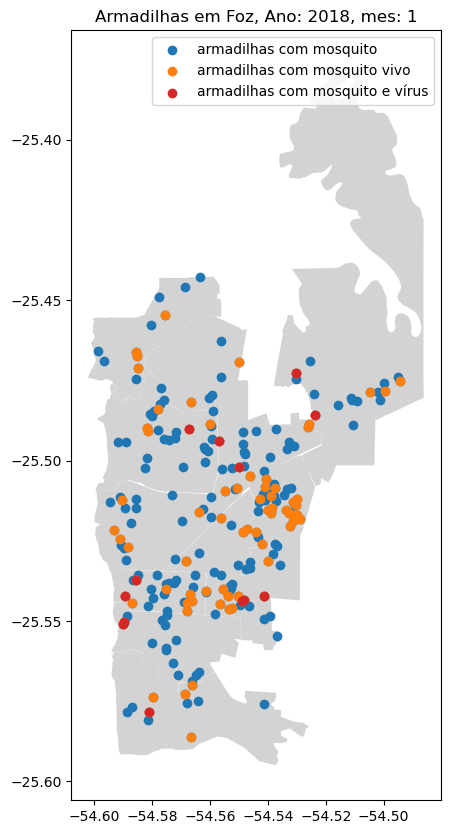

In [22]:
fig, ax = plt.subplots(figsize = (5,10))
map_foz.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
#geo_df_all.plot(ax=ax, color = 'tab:green', label = 'armadilhas total')
geo_df_pos.plot(ax=ax, color = 'tab:blue', label = 'armadilhas com mosquito')
geo_df_pos_vivo.plot(ax=ax, color = 'tab:orange', label = 'armadilhas com mosquito vivo')
geo_df_virus.plot(ax=ax, color = 'tab:red', label = 'armadilhas com mosquito e vírus')
ax.set_title(f'Armadilhas em Foz, Ano: {ano}, mes: {mes}')
ax.legend()
plt.show()